# Zstack projection
This notebook demonstrates how you can use the PadAnalyser package to perform a Zstack projection. This is a common operation in microscopy, where you have a series of 2D images at different focal planes, and you want to create a 2D image that represents the best focus information for each region. 

In [14]:
# Install dependencies with:
# pip install -r requirements.txt

# set up notebook
%load_ext autoreload
%autoreload 2

import os
import natsort
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PadAnalyser.MicrocolonySegmenter import ZStack, MKSegmentUtils, DInfo

IMAGE_FOLDER = 'sample_images'
OUTPUT_FOLDER = 'output'
ZSTACK_FOLDER = 'zstack'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# set up folder paths
input_folder = os.path.join(IMAGE_FOLDER, ZSTACK_FOLDER) 
work_folder = os.path.join(OUTPUT_FOLDER, 'work')
results_folder = os.path.join(OUTPUT_FOLDER, 'results')

# create folders and clear work folder
if not os.path.exists(results_folder): os.makedirs(results_folder)
if not os.path.exists(work_folder): os.makedirs(work_folder)
else: # clear it
    for f in os.listdir(work_folder):
        os.remove(os.path.join(work_folder, f))

stack_folders = [f for f in os.listdir(input_folder) if not '.' in f] # looking for one z-stack per folder
stack_folders = natsort.natsorted(stack_folders)

dinfo = DInfo.DInfo(
    label='stack',
    image_dir=results_folder,
    printing=True,
    live_plot=False,
    file_plot=True,
)

def load_stack(stack_folder):
    files = [f for f in os.listdir(os.path.join(input_folder, stack_folder)) if '.png' in f]
    files = natsort.natsorted(files)
    # print(files)
    return [np.asarray(Image.open(os.path.join(input_folder, stack_folder, f))) for f in files]

z_stacks = [load_stack(stack_folder) for stack_folder in stack_folders]

print(f'{len(z_stacks)} stacks loaded, {stack_folders}')

1 stacks loaded, ['BE148_01_A2_bf_i03']


[[9 10 13 13 None None None None None None None 13 13]
 [9 None None None None None None None None None None None None]
 [None None 10 10 None None 9 None None None None None None]
 [None 8 9 9 None None None None None None None None None]
 [9 9 None None None None None None None None None None None]
 [None None None None None None None 13 None None None None None]
 [None None None None None None 8 None None None None None None]
 [None None None None None None 8 None None None None None None]
 [None 8 8 None None None None 8 9 None None None None]]


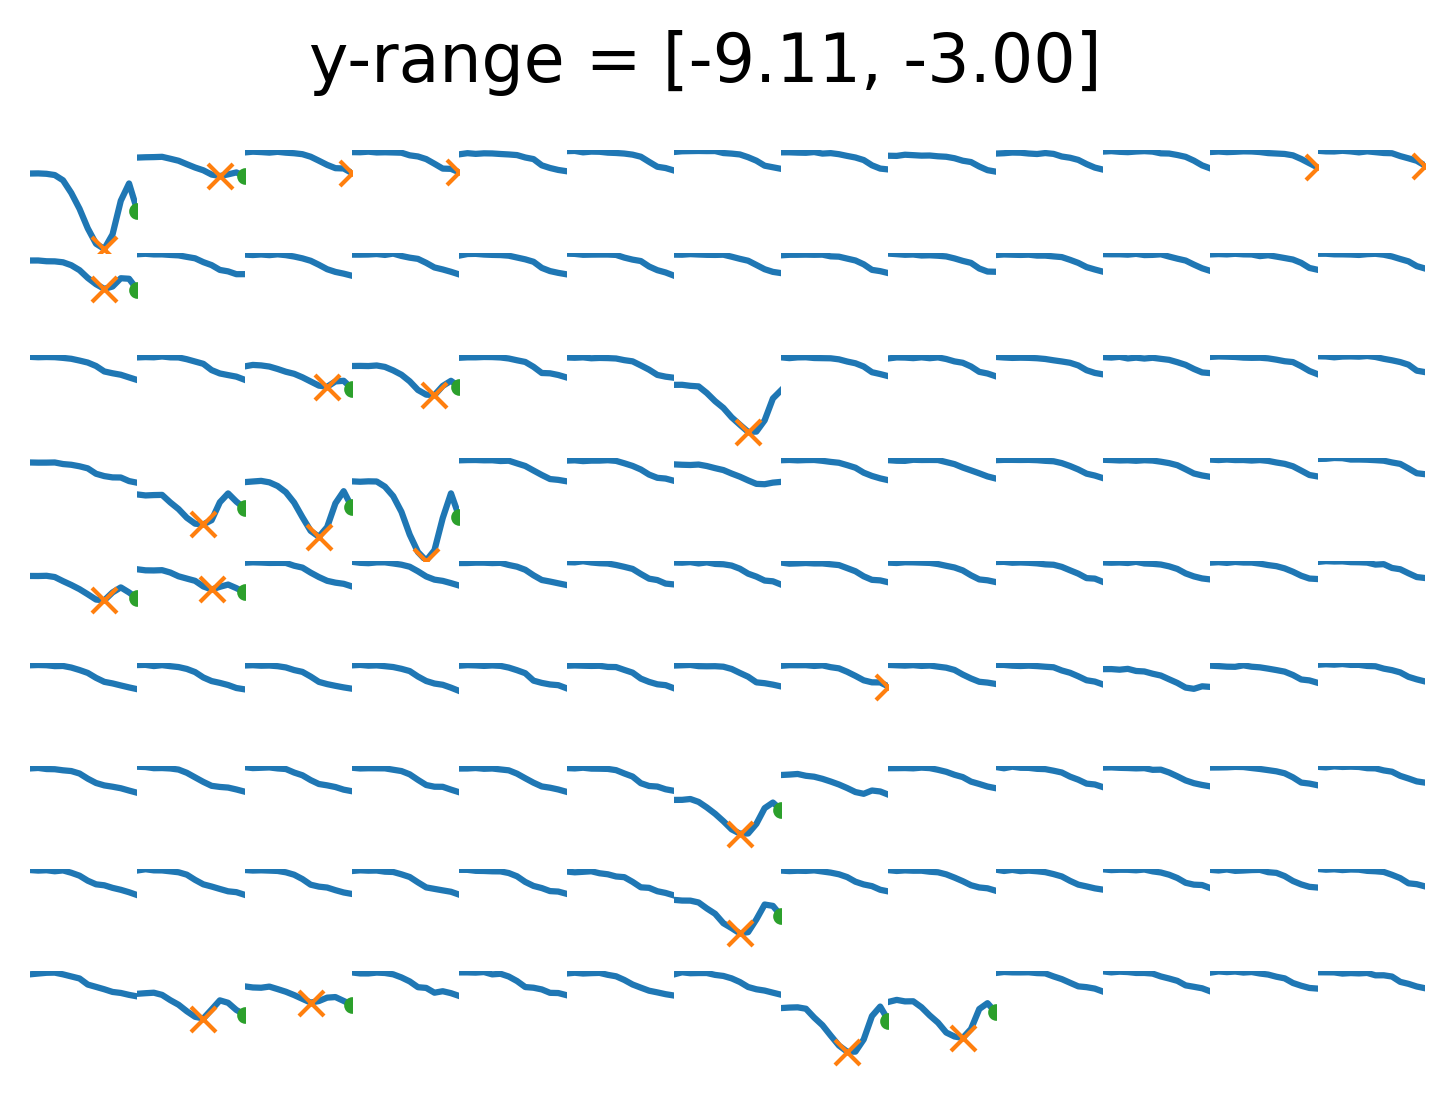

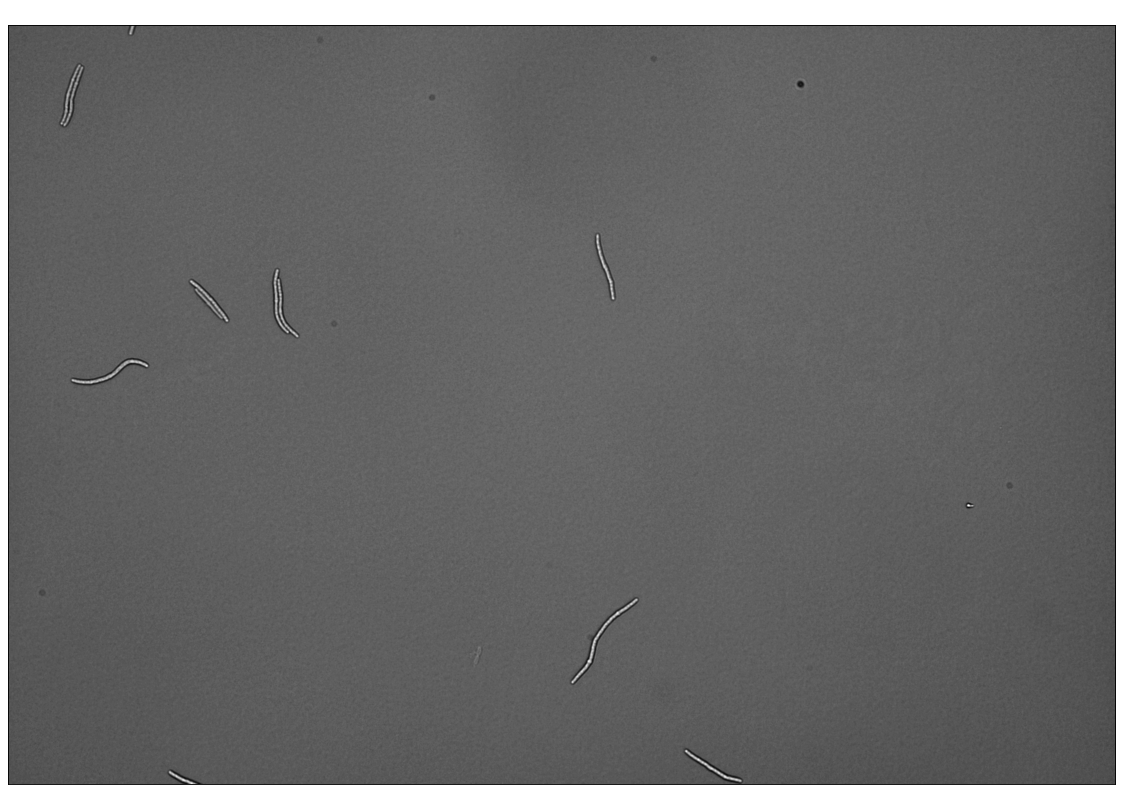

In [16]:
# Zstack projection based on finding best indices, and fitting an interpolating plane
for i, (label, z_stack) in list(enumerate(zip(stack_folders, z_stacks))):
    d = dinfo.append_to_label(label)
    frame, plane_eq = ZStack.flatten_stack(z_stack, dinfo=d.append_to_label('bf_f'))
    MKSegmentUtils.plot_frame(frame, dinfo=dinfo.with_live_plot(True))

# printout shows which indicies are found to be best. No index is returned if there is no clear best index. If there is significant backlash in the z-stage, the focus peaks will not be detected as sharp enough, and the algorithm will not return an index. In this case, use the next cell.

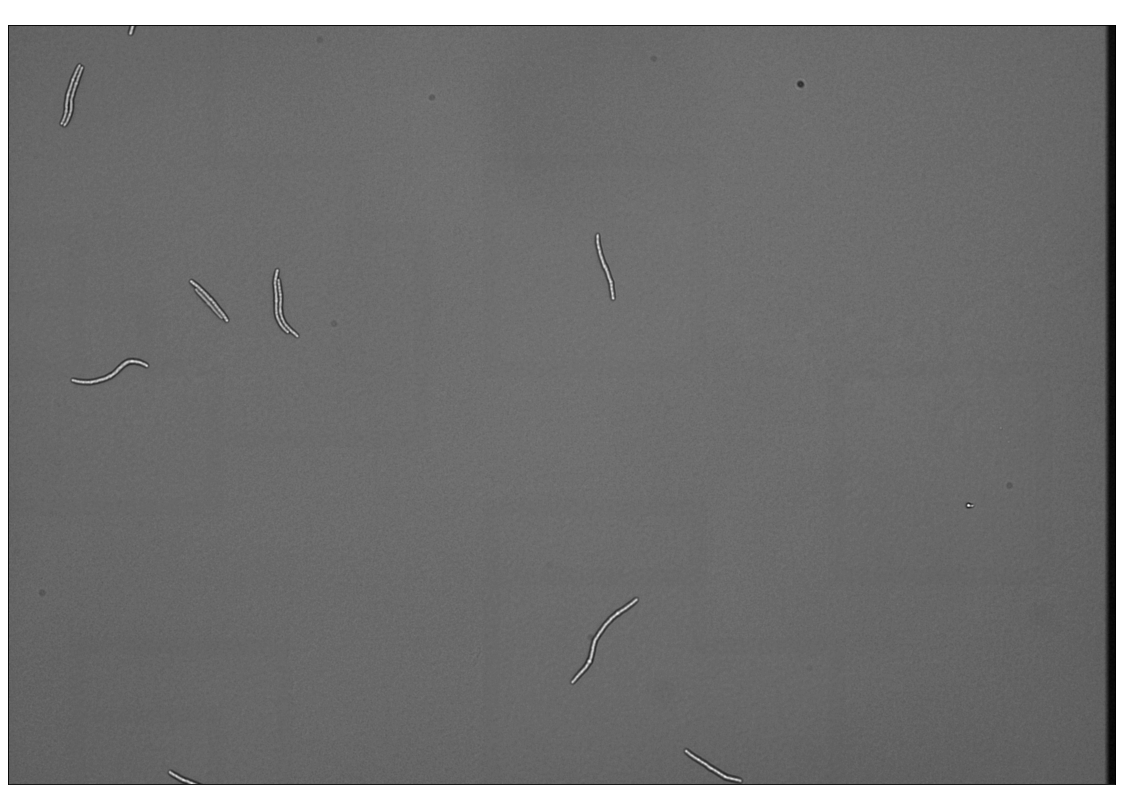

In [17]:
# Zstack projection based on tiling algoritm, use if the previous method fails, set large_backlash to True
for i, (label, z_stack) in list(enumerate(zip(stack_folders, z_stacks))):
    d = dinfo.append_to_label(label)
    frame, plane_eq = ZStack.flatten_stack(z_stack, large_backlash=True, dinfo=d.append_to_label('bf_f'))
    MKSegmentUtils.plot_frame(frame, dinfo=dinfo.with_live_plot(True))